# Navigation

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.4 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 10	Average Score: 0.30
Episode 20	Average Score: 0.157
Episode 30	Average Score: 0.23
Episode 40	Average Score: 0.38
Episode 50	Average Score: 0.38
Episode 60	Average Score: 0.50
Episode 70	Average Score: 0.64
Episode 80	Average Score: 0.72
Episode 90	Average Score: 0.80
Episode 100	Average Score: 0.89
Episode 110	Average Score: 1.26
Episode 120	Average Score: 1.60
Episode 130	Average Score: 1.94
Episode 140	Average Score: 2.40
Episode 150	Average Score: 2.73
Episode 160	Average Score: 3.21
Episode 170	Average Score: 3.58
Episode 180	Average Score: 3.88
Episode 190	Average Score: 4.31
Episode 200	Average Score: 4.88
Episode 210	Average Score: 5.11
Episode 220	Average Score: 5.42
Episode 230	Average Score: 5.87
Episode 240	Average Score: 6.09
Episode 250	Average Score: 6.29
Episode 260	Average Score: 6.50
Episode 270	Average Score: 6.76
Episode 280	Average Score: 7.15
Episode 290	Average Score: 7.58
Episode 300	Average Score: 7.87
Episode 310	Average Score: 8.29
Episode 320	Aver

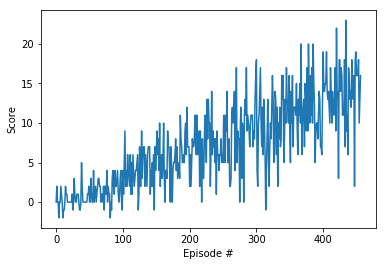

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from double_dqn_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

def dqn(n_episodes=1000, max_t=400, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    agent = Agent(state_size=37, action_size=4, seed=0)

    env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'model.pth')
            break
        
    env.close()
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()